In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn
!pip install --upgrade xlrd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


## COMPOSITS DATASET




In [ ]:
column_names = ['Угол нашивки, град',	'Шаг нашивки',	'Плотность нашивки',	'Соотношение матрица-наполнитель',	'Плотность, кг/м3', 'модуль упругости, ГПа',	'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Температура вспышки, С_2',	'Поверхностная плотность, г/м2',	'Модуль упругости при растяжении, ГПа',	'Прочность при растяжении, МПа',	'Потребление смолы, г/м2']

raw_dataset = pd.read_excel('join.xls', index_col=0)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
1018,90,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,90,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,90,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,90,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067
1022,90,6.078902,77.434468,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342


### Clean the data

The dataset contains a few unknown values:

In [ ]:
dataset.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

Drop those rows to keep this initial tutorial simple:

In [ ]:
dataset = dataset.dropna()
dataset.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
1018,90,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,90,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,90,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,90,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067
1022,90,6.078902,77.434468,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
464,0,4.447498,103.988901,2.440166,1980.132394,357.938256,130.541848,21.177094,290.618547,119.756192,68.900703,1577.288189,129.038238
25,90,5.000000,57.000000,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
110,0,3.708515,78.380006,3.490162,1986.340110,1257.779003,93.748554,24.593272,338.101359,76.682693,76.179383,2605.949634,261.819468
149,0,4.036464,60.329680,1.916843,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.680026,2085.866383,265.171039
152,0,7.557387,58.732672,1.493196,1997.212555,1010.784737,107.549456,17.300539,322.532498,165.345449,72.775930,2144.891733,160.115495


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",818.0,43.899756,45.014071,0.000000,0.000000,0.000000,90.000000,90.000000
Шаг нашивки,818.0,6.879073,2.611603,0.037639,5.000000,6.943337,8.579164,14.440522
Плотность нашивки,818.0,57.288675,12.290801,11.740126,50.036793,57.328584,65.146638,103.988901
Соотношение матрица-наполнитель,818.0,2.943975,0.922190,0.389403,2.320191,2.919678,3.583641,5.591742
"Плотность, кг/м3",818.0,1974.377546,74.987638,1731.764635,1922.343882,1975.555671,2021.186675,2207.773481
"модуль упругости, ГПа",818.0,741.514342,329.799496,2.436909,502.628230,742.886633,966.871905,1911.536477
"Количество отвердителя, м.%",818.0,111.192968,27.797189,29.956150,93.306043,111.507330,129.689233,198.953207
"Содержание эпоксидных групп,%_2",818.0,22.249671,2.395012,14.254985,20.607747,22.267857,23.952628,33.000000
"Температура вспышки, С_2",818.0,286.243917,41.283747,100.000000,260.274330,286.220763,313.518533,403.652861
"Поверхностная плотность, г/м2",818.0,490.129423,280.043448,1.894093,273.012973,463.881777,697.683605,1399.542362


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Прочность при растяжении, МПа')
test_labels = test_features.pop('Прочность при растяжении, МПа')

## Normalization


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
"Угол нашивки, град",43.899756,45.014071
Шаг нашивки,6.879073,2.611603
Плотность нашивки,57.288675,12.290801
Соотношение матрица-наполнитель,2.943975,0.922190
"Плотность, кг/м3",1974.377546,74.987638
"модуль упругости, ГПа",741.514342,329.799496
"Количество отвердителя, м.%",111.192968,27.797189
"Содержание эпоксидных групп,%_2",22.249671,2.395012
"Температура вспышки, С_2",286.243917,41.283747
"Поверхностная плотность, г/м2",490.129423,280.043448


### The Normalization layer


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[  43.9      6.879   57.289    2.944 1974.377  741.514  111.193   22.25
   286.244  490.129   73.369  217.258]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  90.      7.01   66.17    1.42 1977.62  123.73  135.71   18.52  318.44
   171.68   72.97  131.88]]

Normalized: [[ 1.02  0.05  0.72 -1.65  0.04 -1.87  0.88 -1.56  0.78 -1.14 -0.13 -1.44]]


## Linear regression


### Linear regression с одной переменной

In [ ]:
filler_matrix = np.array(train_features['Соотношение матрица-наполнитель'])

filler_matrix_normalizer = layers.Normalization(input_shape=[1,], axis=None)
filler_matrix_normalizer.adapt(filler_matrix)

In [ ]:
filler_matrix_model = tf.keras.Sequential([
    filler_matrix_normalizer,
    layers.Dense(units=1)
])

filler_matrix_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


\This model will predict `'Прочность при растяжении, МПа'` from `'Соотношение матрица-наполнитель'`.


In [ ]:
filler_matrix_model.predict(filler_matrix[:10])

array([[ 2.497],
       [-0.594],
       [-0.036],
       [-2.231],
       [-0.598],
       [ 1.786],
       [ 1.442],
       [ 2.399],
       [ 0.042],
       [-0.012]], dtype=float32)

In [ ]:
filler_matrix_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = filler_matrix_model.fit(
    train_features['Соотношение матрица-наполнитель'],
    train_labels,
    epochs=100,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.83 s, sys: 296 ms, total: 6.13 s
Wall time: 5.93 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2266.863281,2267.724609,95
96,2264.767090,2265.627197,96
97,2262.663330,2263.528320,97
98,2260.561523,2261.425781,98
99,2258.464111,2259.326904,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')

  plt.xlabel('Epoch')
  plt.ylabel('Error [Прочность при растяжении, МПа]')
  plt.legend()
  plt.grid(True)

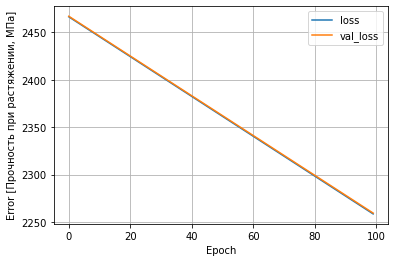

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['filler_matrix_model'] = filler_matrix_model.evaluate(
    test_features['Соотношение матрица-наполнитель'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = filler_matrix_model.predict(x)

In [ ]:
def plot_filler_matrix(x, y):
  plt.scatter(train_features['Соотношение матрица-наполнитель'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Соотношение матрица-наполнитель')
  plt.ylabel('Прочность при растяжении, МПа')
  
  plt.legend()

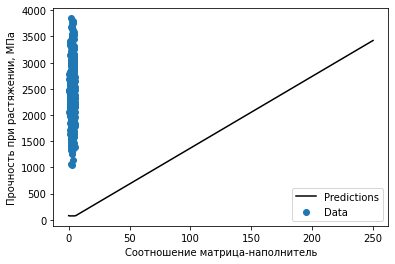

In [ ]:
plot_filler_matrix(x, y)

### Linear regression с несколькими входами

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

array([[-2.27 ],
       [-1.849],
       [ 1.379],
       [ 0.767],
       [ 3.26 ],
       [ 0.048],
       [-0.909],
       [-1.286],
       [-2.417],
       [-0.571]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_29/kernel:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.56 ],
       [ 0.583],
       [-0.152],
       [-0.089],
       [-0.673],
       [ 0.649],
       [-0.358],
       [ 0.425],
       [ 0.399],
       [ 0.295],
       [ 0.136],
       [-0.35 ]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.94 s, sys: 352 ms, total: 6.29 s
Wall time: 6.19 s


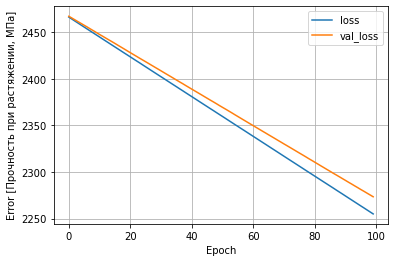

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_filler_matrix_model = build_and_compile_model(filler_matrix_normalizer)

In [ ]:
dnn_filler_matrix_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_30 (Dense)            (None, 64)                128       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_filler_matrix_model.fit(
    train_features['Соотношение матрица-наполнитель'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.97 s, sys: 454 ms, total: 7.42 s
Wall time: 7.06 s


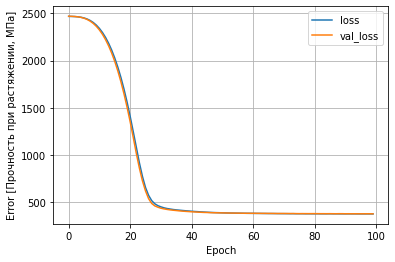

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_filler_matrix_model.predict(x)

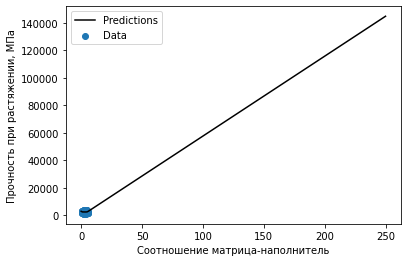

In [ ]:
plot_filler_matrix(x, y)

In [ ]:
test_results['dnn_filler_matrix_model'] = dnn_filler_matrix_model.evaluate(
    test_features['Соотношение матрица-наполнитель'], test_labels,
    verbose=0)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_33 (Dense)            (None, 64)                832       
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 7.43 s, sys: 456 ms, total: 7.89 s
Wall time: 10.7 s


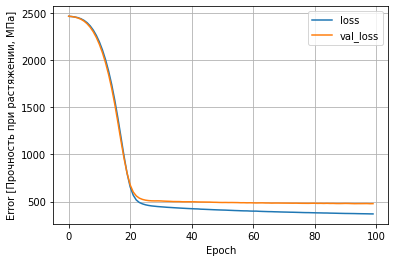

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Прочность при растяжении, МПа]']).T

,"Mean absolute error [Прочность при растяжении, МПа]"
filler_matrix_model,2254.113770
linear_model,2254.833008
dnn_filler_matrix_model,412.811737
dnn_model,460.868622


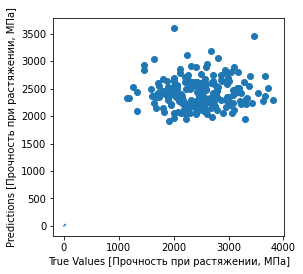

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Прочность при растяжении, МПа]')
plt.ylabel('Predictions [Прочность при растяжении, МПа]')
_ = plt.plot(lims, lims)


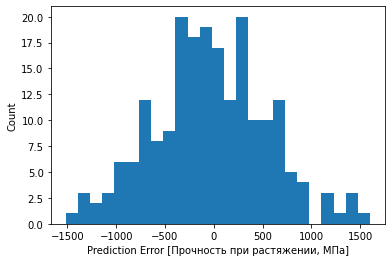

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Прочность при растяжении, МПа]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Прочность при растяжении, МПа]']).T

,"Mean absolute error [Прочность при растяжении, МПа]"
filler_matrix_model,2254.113770
linear_model,2254.833008
dnn_filler_matrix_model,412.811737
dnn_model,460.868622
reloaded,460.868622
